In [9]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
from sklearn.datasets import make_regression

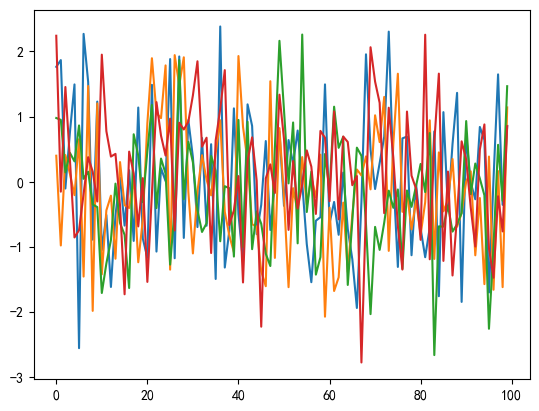

In [5]:
#使用了make_regression函数从头生成一个回归问题的人工数据集
from sklearn.ensemble import RandomForestRegressor
X, y = make_regression(n_features=4, n_informative=2,
                        random_state=0, shuffle=False)

plt.plot(X)

In [6]:
X_train=X[:70]
y_train=y[:70]

X_test=X[:30]
y_test=y[:30]

In [7]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
# 预测
# 测试集
y_pred=regr.predict(X_test)
print(y_pred)

[ 41.71152007 -15.51877479  18.77435453   2.4613485   -5.25163664
  11.98242971 -28.99147231  67.82781115 -46.47813223  58.94403962
 -44.43019803 -25.35127762 -27.46837011 -31.48276853  17.81715876
 -25.42572978 -16.172543   -20.43062853 -20.84673413 -30.25425251
  17.90104445  67.70073552  28.81417535  33.29761523  40.28058259
 -22.61219493  34.50175346  68.835082    38.18859153  -6.48249831]


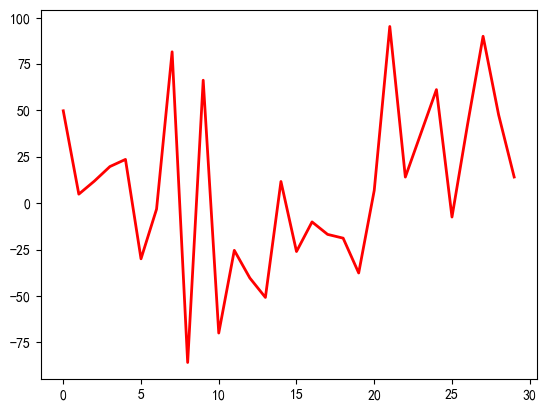

In [10]:
# 绘制y_test曲线
# 创建t变量
t = np.arange(len(X_test))
plt.plot(t, y_test, 'r', linewidth=2, label='真实值')

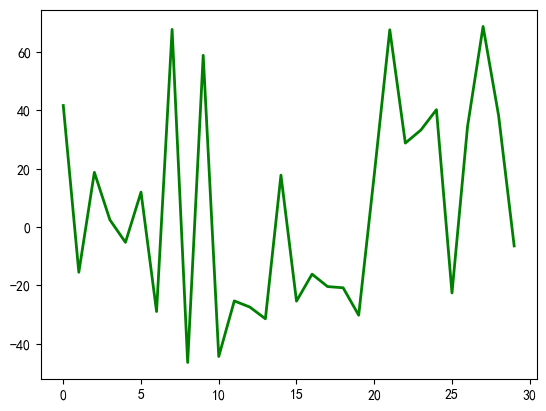

In [11]:
plt.plot(t, y_pred, 'g', linewidth=2, label='预测值')

In [12]:
# param_grid = {"n_estimators":[5,10,50,100,200,500],"max_depth":[5,10,50,100,200,500]}
param_grid = {"n_estimators":[5,50,100],"max_depth":[8,9,10]}

In [13]:
grid_search = GridSearchCV(RandomForestRegressor(),param_grid,cv = 3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [8, 9, 10], 'n_estimators': [5, 50, 100]})

In [14]:
y_pred=grid_search.predict(X_test)
print(y_pred)

[ 48.86569334  -2.02570411  12.03400719  18.26436863  18.63171819
 -20.58361693 -14.27714411  80.04348606 -74.21476122  61.72046867
 -68.00894444 -26.78088505 -33.77600824 -48.40892213  13.58865571
 -25.70109613 -11.45372858 -17.26157627 -19.29733523 -38.60430663
  11.9691367   86.90542311  22.27130302  33.36528997  55.94233248
 -10.70018462  41.46629075  86.41749042  46.95693805  12.86300749]


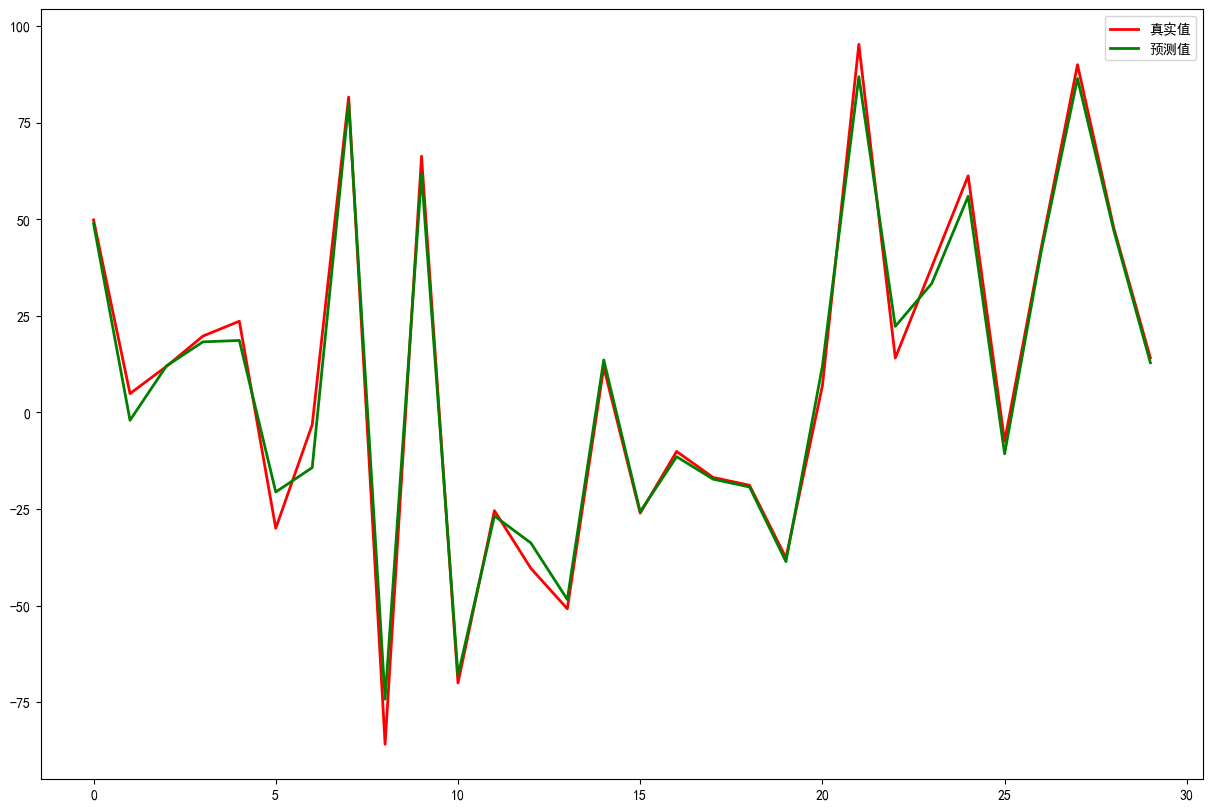

In [15]:
plt.figure(figsize=(15, 10))
# 创建t变量
t = np.arange(len(X_test))
# 绘制y_test曲线
plt.plot(t, y_test, 'r', linewidth=2, label='真实值')
# 绘制y_hat曲线
plt.plot(t, y_pred, 'g', linewidth=2, label='预测值')
# 设置图例
plt.legend()
plt.show()

0.8249288509924222 16 170


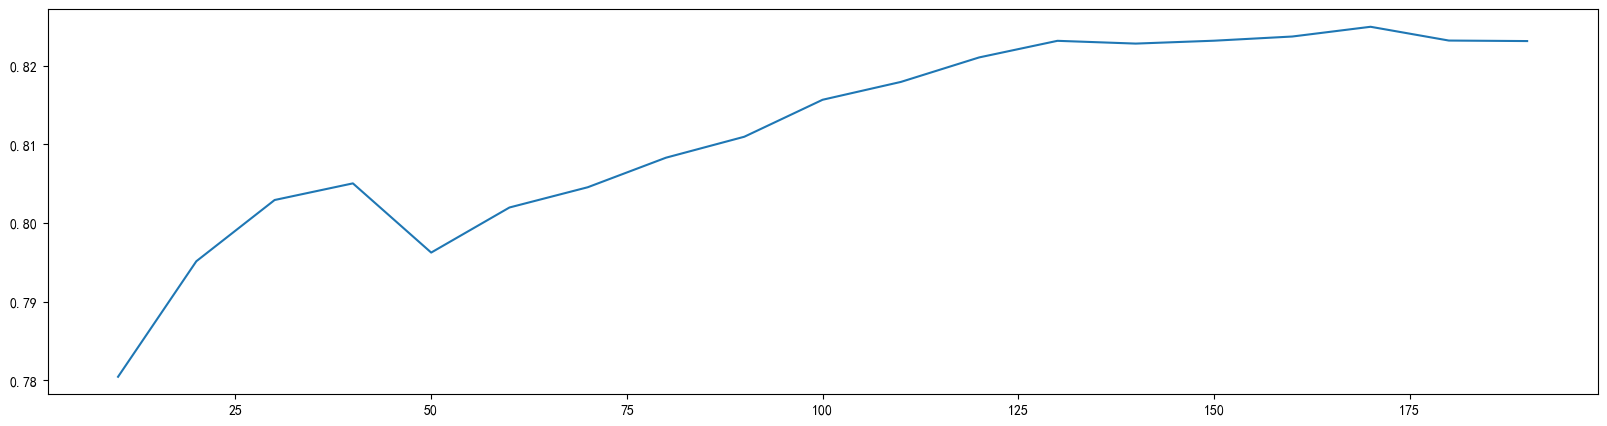

In [16]:
superpa = []
for i in range(10,200,10):
    regr = RandomForestRegressor(n_estimators=i
                                 ,random_state=42
                                 )
    regr_s = cross_val_score(regr
                            ,X_train
                            ,y_train
                            ,cv=10
                            #,scoring='roc_auc'
                           ).mean()# 评估指标
    superpa.append(regr_s)
print(max(superpa),superpa.index(max(superpa)),(superpa.index(max(superpa)))*10+10)#输出最大值及其索引
 
plt.figure(figsize=[20,5])
plt.plot(range(10,200,10),superpa)#横纵坐标
plt.show()

0.8250416513716334 1 12


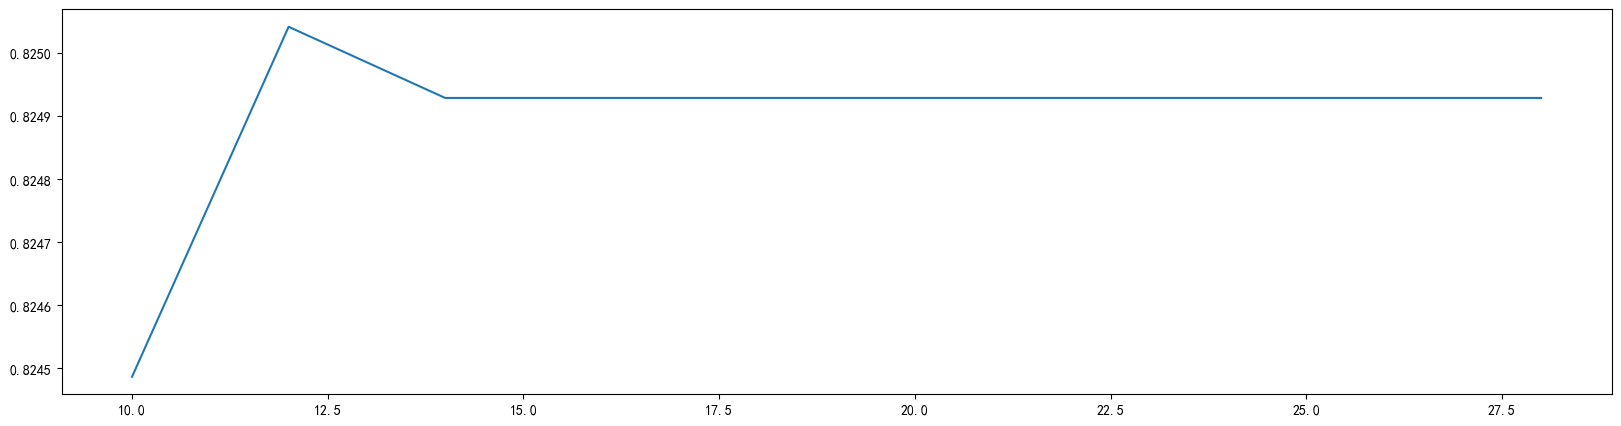

In [17]:
# max_depth的学习曲线
superpa = []
for i in range(10,30,2):
    regr = RandomForestRegressor(n_estimators=170
                                 ,max_depth=i
                                 ,random_state=42
                                 )
    regr_s = cross_val_score(regr
                            ,X_train
                            ,y_train
                            ,cv=10
                            #,scoring='roc_auc'
                           ).mean()# 评估指标
    superpa.append(regr_s)
print(max(superpa),superpa.index(max(superpa)),(superpa.index(max(superpa)))*2+10)#输出最大值及其索引
 
plt.figure(figsize=[20,5])
plt.plot(range(10,30,2),superpa)#横纵坐标

plt.show()

0.8250416513716334 0 2


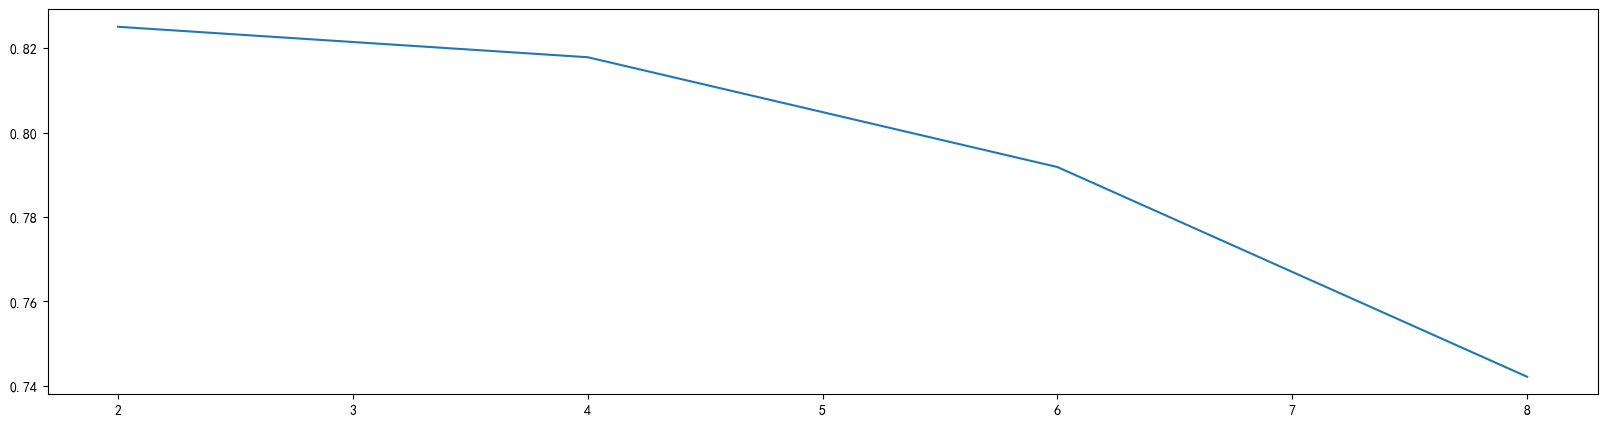

In [18]:
# min_samples_split的学习曲线，分割内部节点所需的最小样本数
superpa = []
for i in range(2,10,2):
    regr = RandomForestRegressor(n_estimators=170
                                 ,max_depth=12
                                 ,min_samples_split=i
                                 ,random_state=42
                                 ,n_jobs=-1)
    regr_s = cross_val_score(regr
                            ,X_train
                            ,y_train
                            ,cv=10
                            #,scoring='roc_auc'
                           ).mean()# 评估指标
    superpa.append(regr_s)
print(max(superpa),superpa.index(max(superpa)),(superpa.index(max(superpa)))*2+2)#输出最大值及其索引
 
plt.figure(figsize=[20,5])
plt.plot(range(2,10,2),superpa)#横纵坐标
plt.show()

0.8250416513716334 0 1


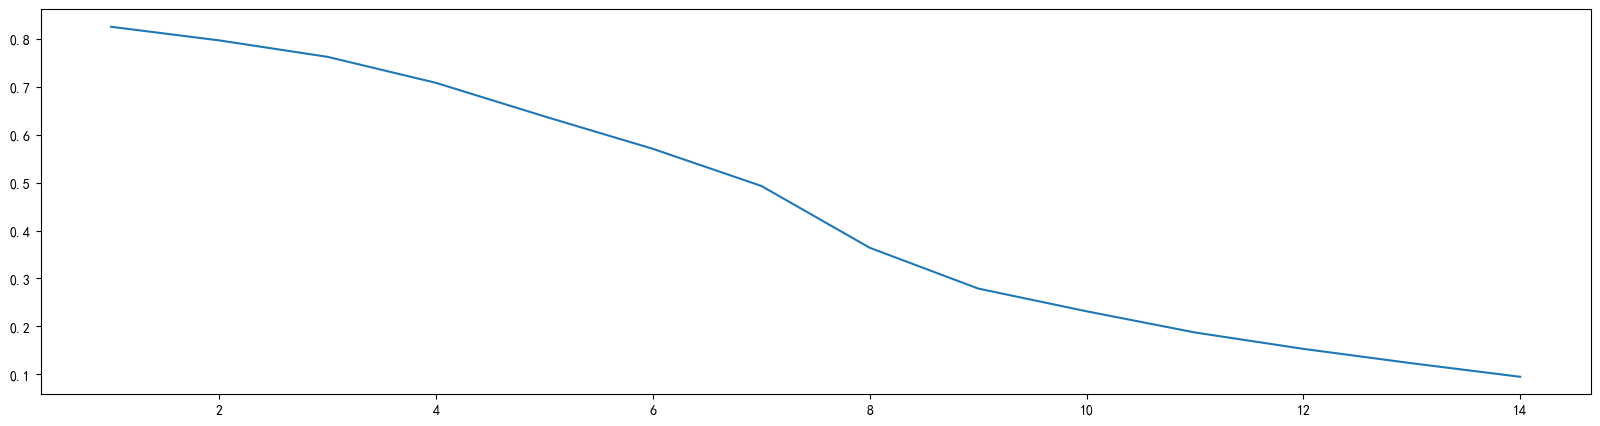

In [24]:
# min_samples_leaf的学习曲线
superpa = []
for i in range(1,15,1):
    regr = RandomForestRegressor(n_estimators=170
                                 ,max_depth=12
                                 ,min_samples_split=2
                                 ,min_samples_leaf=i
                                 ,random_state=42
                                 )
    regr_s = cross_val_score(regr
                            ,X_train
                            ,y_train
                            ,cv=10
                            #,scoring='roc_auc'
                           ).mean()# 评估指标
    superpa.append(regr_s)
print(max(superpa),superpa.index(max(superpa)),(superpa.index(max(superpa)))*1+1)#输出最大值及其索引
 
plt.figure(figsize=[20,5])
plt.plot(range(1,15,1),superpa)#横纵坐标
plt.show()

In [25]:
# max_features的学习曲线，每棵树用到的最大特征数
#from sklearn.model_selection import GridSearchCV
 
param_grid = {'max_features':np.arange(3, 11, 1)} 
 
regr = RandomForestRegressor(n_estimators=170
                                 ,max_depth=12
                                 ,min_samples_split=2
                                 ,min_samples_leaf=1
                                 ,random_state=42
                                 )
GS = GridSearchCV(regr,param_grid,cv=10)
GS.fit(X_train, y_train)
 
print(GS.best_params_)
#print(GS.best_score_)

{'max_features': 4}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\jo

In [26]:
 
param_grid = {'max_features':np.arange(3, 11, 1)} 
 
regr = RandomForestRegressor(n_estimators=170
                                 ,max_depth=12
                                 ,min_samples_split=2
                                 ,min_samples_leaf=1
                                 ,random_state=42
                                 )
GS = GridSearchCV(regr,param_grid,cv=10)
GS.fit(X_train, y_train)
 
print(GS.best_params_)
#print(GS.best_score_)

{'max_features': 4}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\jo

In [28]:
regr = RandomForestRegressor(n_estimators=170
                                 ,max_depth=12
                                 ,min_samples_split=2
                                 ,min_samples_leaf=1
                                 ,random_state=42
                                 )
regr.fit(X_train, y_train) 
# 返回拟合优度the coefficient of determination
regr.score(X_test,y_test)

0.9879834206877871

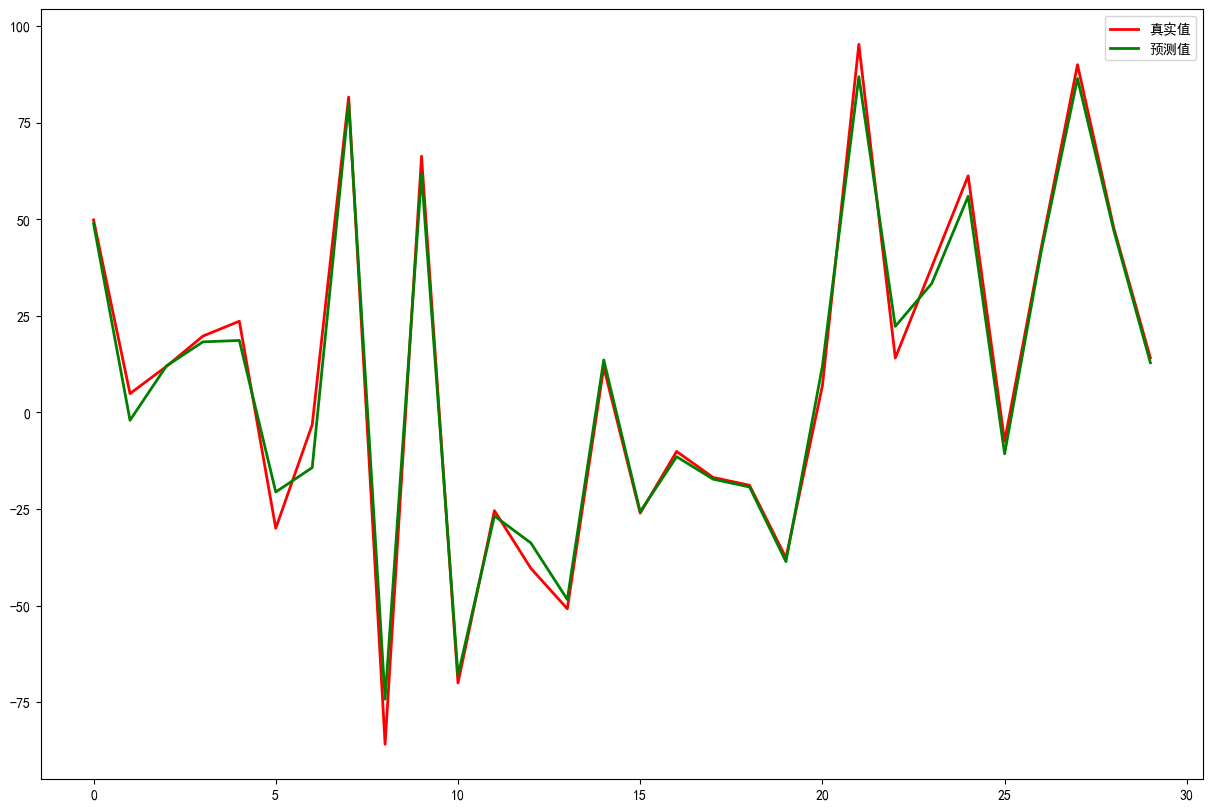

In [30]:
metrics.mean_squared_error(y_test, y_pred)
24.275331856914285

regr.set_params()
RandomForestRegressor(max_depth=12, n_estimators=170, random_state=42)

regr.feature_importances_


plt.figure(figsize=(15, 10))
# 创建t变量
t = np.arange(len(X_test))
# 绘制y_test曲线
plt.plot(t, y_test, 'r', linewidth=2, label='真实值')
# 绘制y_hat曲线
plt.plot(t, y_pred, 'g', linewidth=2, label='预测值')
# 设置图例
plt.legend()
plt.show()